In [1]:
#Importing the necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

### Loading the Dataset

In [2]:
data = pd.read_excel('/content/iris (1).xls')

In [3]:
data.head(5)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# Checking for Null values
pd.DataFrame([data.isnull().sum(),data.isna().sum()], index=["#null","#na"])

,SL,SW,PL,PW,Classification
#null,7,6,6,0,0
#na,7,6,6,0,0


From the result above, we can see some missing values in the SL, SW and PL columns.

## Preprocessing

### 1) Fill The Missing Values

In [7]:
for i in data.columns[0:3]:
  data[i] = data[i].fillna(data[i].median())

In [8]:
# Check if there is any more misssing values
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Filled all the missing values with median values.

### 2) Handle the Outliers


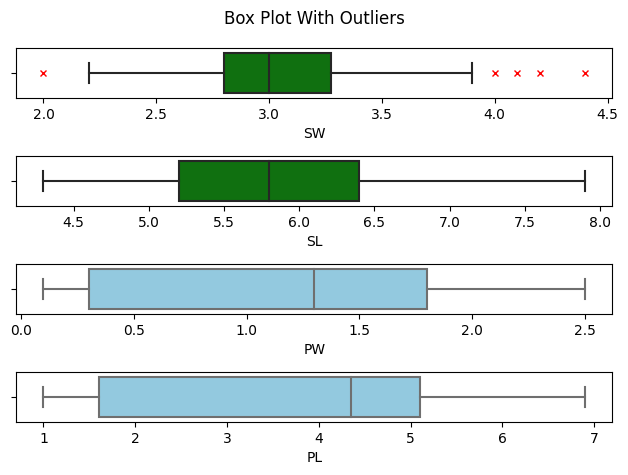

In [10]:
flier = dict(marker = "x",markeredgecolor = "red")

fig, axs = plt.subplots(4,1)
sns.boxplot(x='SW', data=data, ax=axs[0],color='green',flierprops = flier)
sns.boxplot(x='SL', data=data, ax=axs[1],color='green',flierprops = flier)
sns.boxplot(x='PW', data=data, ax=axs[2],color='skyblue',flierprops = flier)
sns.boxplot(x='PL', data=data, ax=axs[3],color='skyblue',flierprops = flier)

plt.suptitle("Box Plot With Outliers")
plt.tight_layout()

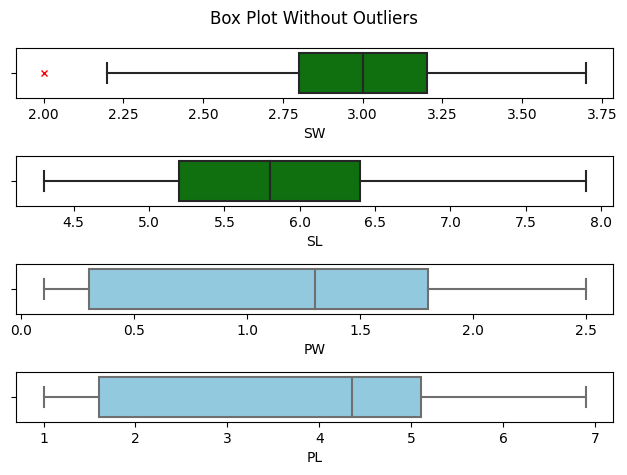

In [20]:
# Creating a function called 'minmax'
def minmax(data,column):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)

  IQR = Q3 -Q1

  Min = Q1-1.3*IQR
  Max = Q3+1.3*IQR
  return Min,Max

Min,Max = minmax(data,'SW')

# Get the outliers range
outlier = ((data['SW']>Max))
out_index = np.where(outlier)[0]

# Get the median value to impute
median = data['SW'].median()

# Impute the outliers with median value
data['SW'] = data['SW'].mask(outlier,other= median)

# Modifier for fliers
flier = dict(marker = "x",markeredgecolor = "red")

fig, axs = plt.subplots(4,1)
sns.boxplot(x='SW', data=data, ax=axs[0],color='green',flierprops = flier)
sns.boxplot(x='SL', data=data, ax=axs[1],color='green',flierprops = flier)
sns.boxplot(x='PW', data=data, ax=axs[2],color='skyblue',flierprops = flier)
sns.boxplot(x='PL', data=data, ax=axs[3],color='skyblue',flierprops = flier)

plt.suptitle("Box Plot Without Outliers")
plt.tight_layout()

### 3) Encode The Categorical Values

In [21]:
data['Classification'] = LabelEncoder().fit_transform(data['Classification'])
data.tail(3)

,SL,SW,PL,PW,Classification
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2
149,5.9,3.0,5.10,1.8,2


# Supervised ML Classification Algorithms

In [22]:
x = data[data.columns[0:4]]
y = data['Classification']

# Split into train, test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3)

### 1) Logistic Regression

In [25]:
classifier = LogisticRegression(solver='liblinear', random_state=50).\
fit(x_train,y_train)

score = classifier.score(x_test,y_test)

print("Accuracy Score:",round(score*100,2),"%")

Accuracy Score: 86.67 %


### 2) K-nearest Neighbors (KNN)

In [26]:
classifier = KNeighborsClassifier(n_neighbors = 8).\
fit(x_train, y_train)

score = classifier.score(x_test,y_test)

print("Accuracy Score:",round(score*100,2),"%")

Accuracy Score: 91.11 %


### 3) Support Vector Machine (SVM)

In [27]:
classifier = SVC(C=5.0,kernel='linear', random_state=0, probability=True).\
fit(x_train, y_train)

score = classifier.score(x_test,y_test)

print("Accuracy Score:",round(score*100,2),"%")

Accuracy Score: 95.56 %


### 4) Decision Tree

In [28]:
classifier = DecisionTreeClassifier(criterion='entropy',splitter='best',\
                 max_depth=3,random_state=50).fit(x_train, y_train)

score = classifier.score(x_test,y_test)

print("Accuracy Score:",round(score*100,2),"%")

Accuracy Score: 93.33 %


### 5) Random Forest

In [29]:
classifier = RandomForestClassifier(n_estimators=2,criterion='gini',max_features='log2').\
fit(x_train, y_train)

score = classifier.score(x_test,y_test)

print("Accuracy Score:",round(score*100,2),"%")

Accuracy Score: 86.67 %


### 6) Adeboost

In [30]:
classifier = AdaBoostClassifier(n_estimators=5,random_state=30,algorithm='SAMME.R').\
fit(x_train, y_train)

score = classifier.score(x_test,y_test)

print("Accuracy Score:",round(score*100,2),"%")

Accuracy Score: 93.33 %


# Evaluation


## After performing classification algorithms on our dataset, highest score on accuracy got in **Support Vector Machine (SVM)**, which is **95.56%** .

## The second highest score delivered by multiple classifiers which is 93.33 %, those are Decision Tree and AdeBoost.

## The third highest score is 91.11% delivered by K-nearest Neighbors (KNN).

## Logistic Regression and Random Forest came last and delivers 86.67%.